In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('house_price_dống-da.xlsx')

##### 1. Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [4]:
df[df.isna().any(axis=1)]

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
5,"Bán gấp mặt phố Chùa Bộc, Đống Đa, thang máy, ...","Phố Chùa Bộc, Phường Quang Trung, Đống Đa, Hà Nội",41.0,13500.0,2021-04-04,Sổ đỏ,NaN,NaN,5.0,3.0,6.0,Bán nhà mặt phố\n,Phố Chùa Bộc,Phường Quang Trung,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
6,Bán nhà mặt phố Hoàng Cầu - Mai Anh Tuấn. Đối ...,"Phố Hoàng Cầu, Phường Láng Hạ, Đống Đa, Hà Nội",50.0,13000.0,2021-04-06,Sổ đỏ,NaN,NaN,5.0,4.0,5.0,Bán nhà mặt phố\n,Phố Hoàng Cầu,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.014612,105.819296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Bán nhà mặt phố Yên Lãng, Đống Đa, 65m2, 5T, 1...","Đường Yên Lãng, Phường Láng Hạ, Đống Đa, Hà...",65.0,17500.0,2021-05-09,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Đường Yên Lãng,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
996,"Bán nhà 5 tầng đep MP Yên Lãng giá rẻ, DT 60m2...","Đường Yên Lãng, Phường Trung Liệt, Đống Đa, ...",60.0,17500.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
997,MẶT PHỐ XÃ ĐÀN - KINH DOANH ĐỈNH CAO - 6 TẦNG ...,"Phố Xã Đàn, Phường Ô Chợ Dừa, Đống Đa, Hà Nội",45.0,24800.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Đường Ô Chợ Dừa,Phường Ô Chợ Dừa,Quận Đống Đa,Thành phố Hà Nội,21.016106,105.832157
998,"Bán nhà mặt hồ Văn Chương, Đống Đa 33m2, 6 tần...","Hồ Văn Chương, Phường Văn Chương, Quận Đống Đa...",178.0,8100.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,3.0,NaN,Bán nhà riêng,Đường Hồ Văn Chương,Phường Văn Chương,Quận Đống Đa,Thành phố Hà Nội,21.021345,105.833122


In [5]:
df.isna().sum()

title                  0
address                0
area                   6
price                 56
postDate               0
land_certificate     307
house_direction      956
balcony_direction    976
toilet               449
bedroom              365
floor                624
type_of_land           0
street_name          192
ward_name            198
district_name          0
city_name              0
lat                    0
long                   0
dtype: int64

##### 2. Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [6]:
df.dropna( subset=['price'], axis=0, inplace=True)
df.isna().sum()

title                  0
address                0
area                   2
price                  0
postDate               0
land_certificate     261
house_direction      901
balcony_direction    920
toilet               396
bedroom              313
floor                577
type_of_land           0
street_name          153
ward_name            156
district_name          0
city_name              0
lat                    0
long                   0
dtype: int64

##### 3. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, 
#####  house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó.

In [7]:
df['land_certificate'].fillna('unknow', inplace=True)
df['land_certificate'].unique()

array(['Sổ đỏ', 'unknow'], dtype=object)

In [8]:
def fill_mode(x):
    return x.fillna(x.mode()[0])
df[['house_direction','balcony_direction', 'toilet', 'bedroom', 'floor']] =\
     df[['house_direction','balcony_direction', 'toilet', 'bedroom', 'floor']].apply(fill_mode, axis=0)

In [9]:
df.isna().sum()

title                  0
address                0
area                   2
price                  0
postDate               0
land_certificate       0
house_direction        0
balcony_direction      0
toilet                 0
bedroom                0
floor                  0
type_of_land           0
street_name          153
ward_name            156
district_name          0
city_name              0
lat                    0
long                   0
dtype: int64

##### 4. Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [10]:
df.head(1)

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583


In [11]:
df[['type_of_land']].value_counts().unique

<bound method Series.unique of type_of_land        
Bán nhà riêng           315
Bán nhà riêng\n         245
Bán nhà mặt phố\n       168
Tập thể, cư xá           69
Bán nhà mặt phố          61
Chung cư                 59
Bất động sản khác\n      10
Bất động sản khác         9
Đất thổ cư                8
dtype: int64>

In [12]:
df3 = df[~df['type_of_land'].isin(['Bán nhà mặt phố\n ','Bán nhà mặt phố'])]
    # df[~df['type_of_land'].isin(['Bán nhà mặt phố\n ','Bán nhà mặt phố'])]
df3[['type_of_land']].value_counts().unique 

<bound method Series.unique of type_of_land        
Bán nhà riêng           315
Bán nhà riêng\n         245
Tập thể, cư xá           69
Chung cư                 59
Bất động sản khác\n      10
Bất động sản khác         9
Đất thổ cư                8
dtype: int64>

In [13]:
df3.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
7,Bán nhà phường Thổ Quan ngõ thoáng 26m2 x 4 tầ...,"Đường Trung Phụng, Phường Thổ Quan, Đống Đa, ...",26.0,2900.0,2021-04-06,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,3.0,4.0,Bán nhà riêng\n,Đường Trung Phụng,Phường Trung Phụng,Quận Đống Đa,Thành phố Hà Nội,21.014325,105.834918
8,"Chính chủ bán nhà Xã Đàn 40m2, chỉ 3. X tỷ","Phố Xã Đàn, Phường Kim Liên, Đống Đa, Hà Nội",40.0,3950.0,2021-04-06,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,5.0,Bán nhà riêng\n,Đường Kim Liên,Phường Kim Liên,Quận Đống Đa,Thành phố Hà Nội,21.009862,105.838083


##### 5. Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [14]:
df3.columns

Index(['title', 'address', 'area', 'price', 'postDate', 'land_certificate',
       'house_direction', 'balcony_direction', 'toilet', 'bedroom', 'floor',
       'type_of_land', 'street_name', 'ward_name', 'district_name',
       'city_name', 'lat', 'long'],
      dtype='object')

In [15]:
df3['Tr/m2'] = df3['price']/df3['area'];

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_18660/2291817934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Tr/m2'] = df3['price']/df3['area'];


In [16]:
df3.head(1)

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,Tr/m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.0


##### 6. Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

<AxesSubplot:>

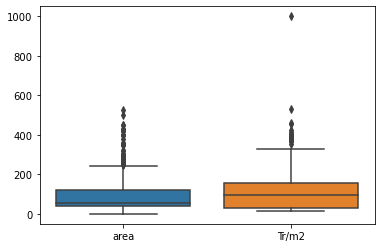

In [17]:
sns.boxplot(data = df3[['area','Tr/m2']])

In [18]:
Q1_area = df3['area'].quantile(0.25)
Q3_area = df3['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
Q1_Tr = df3['Tr/m2'].quantile(0.25)
Q3_Tr = df3['Tr/m2'].quantile(0.75)
IQR_Tr = Q3_Tr - Q1_Tr

In [19]:
# Điểm ngoại lai sẽ là những điểm mà nằm dưới Q1 ít nhất là 1.5*IQR, hoặc nằm trên Q3 ít nhất là 1.5*IQR.
df_no_oulier = df3[~(df3['area'] < (Q1_area - 1.5*IQR_area)) 
    | (df3['area'] > (Q3_area + 1.5*IQR_area))
    | (df3['Tr/m2'] < (Q1_Tr - 1.5*IQR_Tr)) 
    | (df3['Tr/m2'] > (Q3_Tr + 1.5*IQR_Tr))]

In [20]:
df_no_oulier.describe() 

,area,price,toilet,bedroom,floor,lat,long,Tr/m2
count,714.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,714.000000
mean,93.303151,7468.904336,3.616783,3.762238,4.896503,21.015646,105.823942,inf
std,85.309184,8339.914435,1.656410,1.722150,0.838784,0.006899,0.009989,NaN
min,0.000000,30.000000,1.000000,1.000000,1.000000,20.998499,105.795544,13.600000
25%,40.000000,3150.000000,3.000000,3.000000,5.000000,21.010448,105.816666,29.166667
50%,55.500000,5000.000000,4.000000,4.000000,5.000000,21.017799,105.825845,93.993506
75%,120.000000,8800.000000,4.000000,4.000000,5.000000,21.020312,105.829949,158.266129
max,525.000000,120000.000000,16.000000,14.000000,11.000000,21.036845,105.841429,inf


### 7. Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, 
### Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [22]:
df3.isna().sum()

title                  0
address                0
area                   1
price                  0
postDate               0
land_certificate       0
house_direction        0
balcony_direction      0
toilet                 0
bedroom                0
floor                  0
type_of_land           0
street_name          108
ward_name            108
district_name          0
city_name              0
lat                    0
long                   0
Tr/m2                  1
dtype: int64

In [23]:
df3.dropna(subset=['Tr/m2'], inplace=True)
df3.isna().sum()

c:\Users\Acer Nitro5\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


title                  0
address                0
area                   0
price                  0
postDate               0
land_certificate       0
house_direction        0
balcony_direction      0
toilet                 0
bedroom                0
floor                  0
type_of_land           0
street_name          108
ward_name            108
district_name          0
city_name              0
lat                    0
long                   0
Tr/m2                  0
dtype: int64

In [24]:
df_number = df3.select_dtypes(['float64', 'int64']) 
df_number

,area,price,toilet,bedroom,floor,lat,long,Tr/m2
0,50.0,14700.0,4.0,6.0,6.0,21.015698,105.824583,294.000000
2,57.0,4200.0,3.0,8.0,4.0,21.025208,105.833111,73.684211
3,62.0,11000.0,6.0,5.0,6.0,21.025379,105.801011,177.419355
7,26.0,2900.0,4.0,3.0,4.0,21.014325,105.834918,111.538462
8,40.0,3950.0,4.0,4.0,5.0,21.009862,105.838083,98.750000
...,...,...,...,...,...,...,...,...
989,38.0,3900.0,4.0,3.0,5.0,21.006694,105.835635,102.631579
990,168.0,3700.0,5.0,4.0,5.0,21.008365,105.818022,22.023810
991,180.0,4100.0,5.0,4.0,5.0,21.008365,105.818022,22.777778
994,25.0,2850.0,3.0,2.0,4.0,21.026821,105.825845,114.000000


##### 7.1. Phương pháp Z-Score

In [25]:
df_number.columns

Index(['area', 'price', 'toilet', 'bedroom', 'floor', 'lat', 'long', 'Tr/m2'], dtype='object')

<AxesSubplot:>

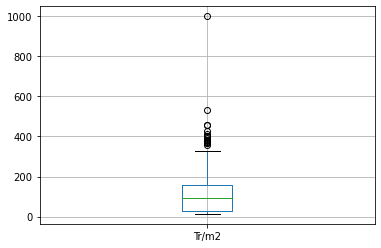

In [26]:
df_number[['Tr/m2']].boxplot()

In [27]:
s_scaler = StandardScaler()

In [31]:
df_s = s_scaler.fit_transform(df_number) 

ValueError: Input contains infinity or a value too large for dtype('float64').

##### 7.2 min-max scalling

In [29]:
scaler = MinMaxScaler

In [30]:
# scaler = MinMaxScaler()
# scale_df = scaler.fit_transform(df_number)
# scale_df = pd.DataFrame(scale_df, columns = df_number.columns)
# scale_df